In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset

card_fraud=pd.read_csv("C:/Users/user/Desktop/Data Science/Fraud Detection_20174392719_1491204439457_log.csv")
card_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
card_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
card_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
#check for missing values in each column

card_fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

According to the data source; Kaggle

NOTE: Transactions which are detected as fraud are cancelled, so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) must not be used.

Therefore, we will drop these columns as we will not used them to detect fraud. 

In [6]:
#delete the columns

card_fraud.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

We will filter transactions greater than 200 in amount as an illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [7]:
# Filter transactions where the amount is greater than 200
filtered_card_fraud = card_fraud[card_fraud['amount'] > 200]

# Display the filtered dataset
print(filtered_card_fraud)

         step      type      amount     nameOrig     nameDest  isFraud  \
0           1   PAYMENT     9839.64  C1231006815  M1979787155        0   
1           1   PAYMENT     1864.28  C1666544295  M2044282225        0   
4           1   PAYMENT    11668.14  C2048537720  M1230701703        0   
5           1   PAYMENT     7817.71    C90045638   M573487274        0   
6           1   PAYMENT     7107.77   C154988899   M408069119        0   
...       ...       ...         ...          ...          ...      ...   
6362615   743  CASH_OUT   339682.13   C786484425   C776919290        1   
6362616   743  TRANSFER  6311409.28  C1529008245  C1881841831        1   
6362617   743  CASH_OUT  6311409.28  C1162922333  C1365125890        1   
6362618   743  TRANSFER   850002.52  C1685995037  C2080388513        1   
6362619   743  CASH_OUT   850002.52  C1280323807   C873221189        1   

         isFlaggedFraud  
0                     0  
1                     0  
4                     0  
5      

In [8]:
#find the number of uniques values to understand before ploting 

card_fraud.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
nameDest          2722362
isFraud                 2
isFlaggedFraud          2
dtype: int64

isFraud - identifies a fraudulent transaction (1) and non fraudulent (0)

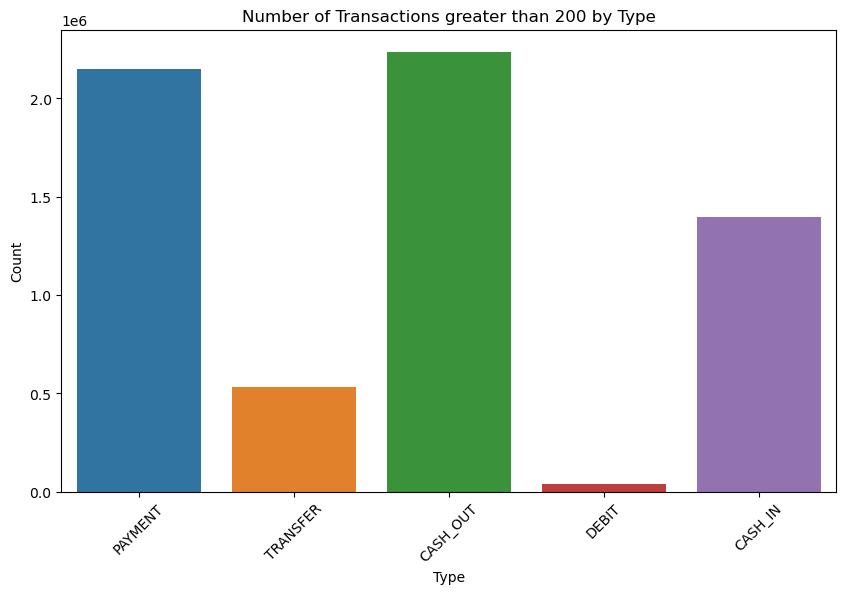

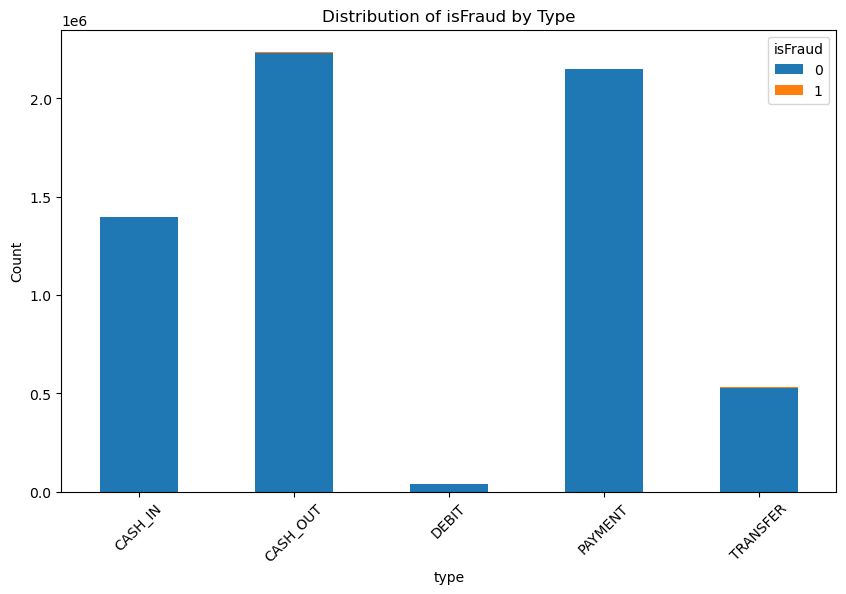

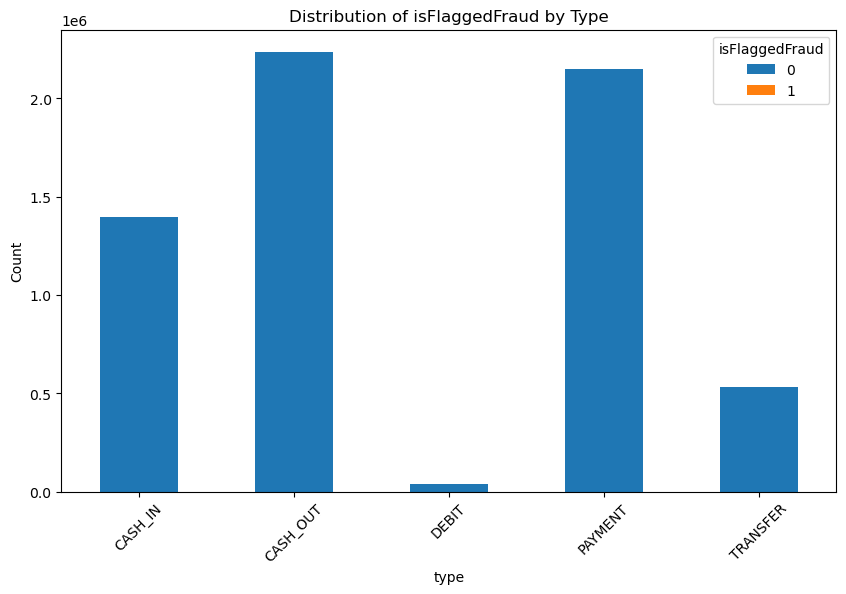

In [9]:
# plots for categorical columns
   
   #1 barplot of number of transactions greater than 200 (amount) per type of the transaction (type)
plt.figure(figsize=(10, 6))
sns.countplot(data=card_fraud, x='type')
plt.title('Number of Transactions greater than 200 by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


   #2 plot of Distribution of isFraud by type
isFraud_counts = pd.crosstab(card_fraud['type'], card_fraud['isFraud'])
isFraud_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of isFraud by Type')
plt.xlabel('type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#3 plot of Distribution of isFlaggedFraud by type
isFlaggedFraud_counts = pd.crosstab(card_fraud['type'], card_fraud['isFlaggedFraud'])
isFlaggedFraud_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of isFlaggedFraud by Type')
plt.xlabel('type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


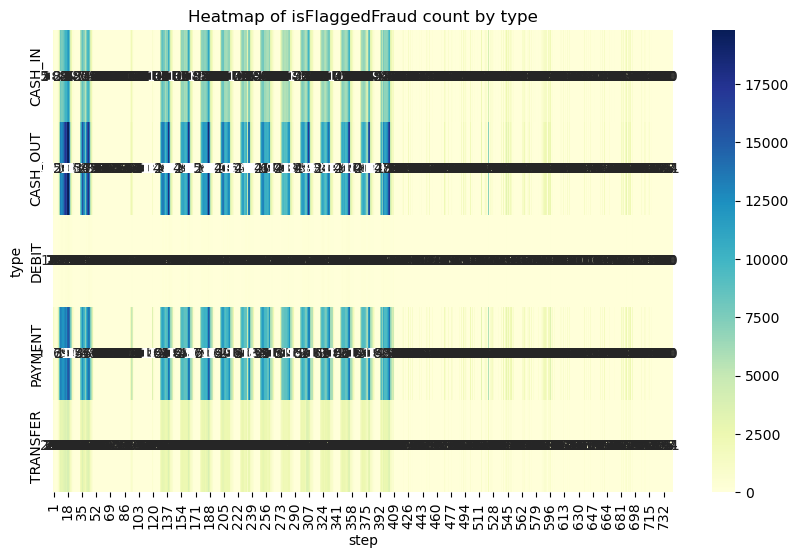

In [10]:
 #4 Heatmap of isFlaggedFraud count by type
isFlaggedFraud_counts = pd.crosstab(card_fraud['type'], card_fraud['step'])
plt.figure(figsize=(10, 6))
sns.heatmap(isFlaggedFraud_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of isFlaggedFraud count by type')
plt.xlabel('step')
plt.ylabel('type')
plt.show()

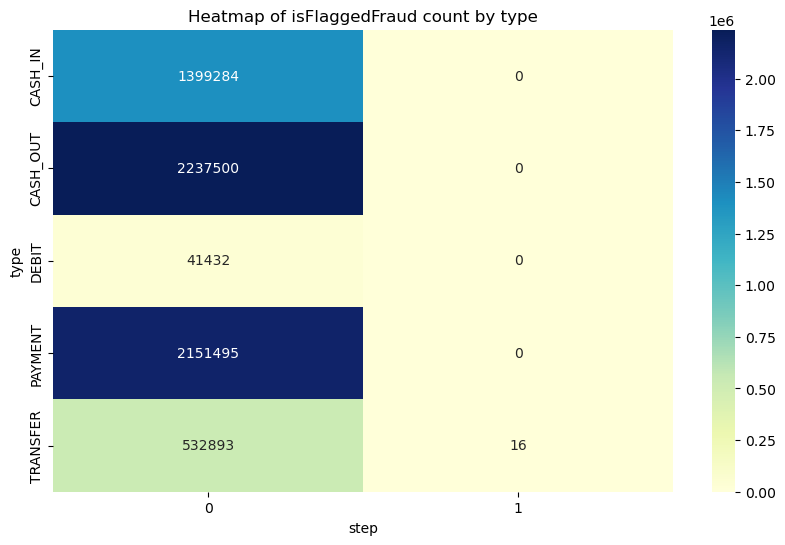

In [11]:
 #5 Heatmap of isFlaggedFraud count by type
isFlaggedFraud_counts = pd.crosstab(card_fraud['type'], card_fraud['isFlaggedFraud'])
plt.figure(figsize=(10, 6))
sns.heatmap(isFlaggedFraud_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of isFlaggedFraud count by type')
plt.xlabel('step')
plt.ylabel('type')
plt.show()

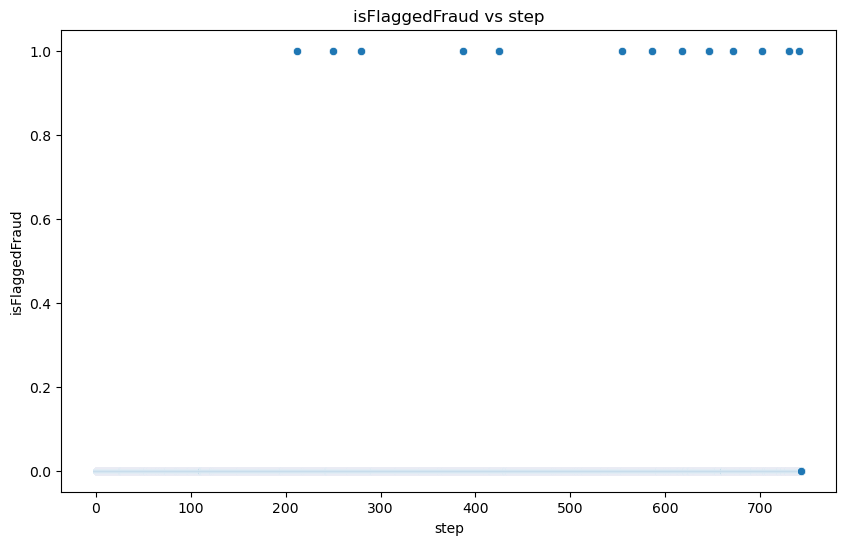

In [12]:
#1 scatter plot of isFlaggedFraud and step
plt.figure(figsize=(10, 6))
sns.scatterplot(data=card_fraud, x='step', y='isFlaggedFraud')
plt.title('isFlaggedFraud vs step')
plt.xlabel('step')
plt.ylabel('isFlaggedFraud')
plt.show()